In [37]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import pandas as pd
from fly_analysis.trajectory import heading_direction_diff
import matplotlib.ticker as ticker
import os
import csv

In [22]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241209_141918.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241209_141918.braidz using pyarrow


In [23]:
df,csvs["opto"]



(          obj_id    frame     timestamp         x         y         z  \
 0              0    54022  1.733750e+09  0.069139  0.088468  0.121984   
 1              0    54023  1.733750e+09  0.068365  0.089041  0.122012   
 2              0    54024  1.733750e+09  0.067561  0.089297  0.122077   
 3              0    54025  1.733750e+09  0.066866  0.088721  0.122714   
 4              0    54026  1.733750e+09  0.065946  0.088159  0.122865   
 ...          ...      ...           ...       ...       ...       ...   
 13039249  145217  7643456  1.733826e+09 -0.218004 -0.036865  0.015146   
 13039250  145217  7643457  1.733826e+09 -0.218043 -0.036822  0.015091   
 13039251  145217  7643458  1.733826e+09 -0.218062 -0.036802  0.015020   
 13039252  145217  7643459  1.733826e+09 -0.218083 -0.036768  0.014956   
 13039253  145217  7643460  1.733826e+09 -0.218100 -0.036758  0.014880   
 
               xvel      yvel      zvel           P00           P01  \
 0        -0.075514  0.097510 -0.037361

In [24]:
data = extract_stimulus_centered_data(df, csvs["opto"])
AngVel_Second_Repeat = data["angular_velocity"]
LinearVel_Second_Repeat = data["linear_velocity"]

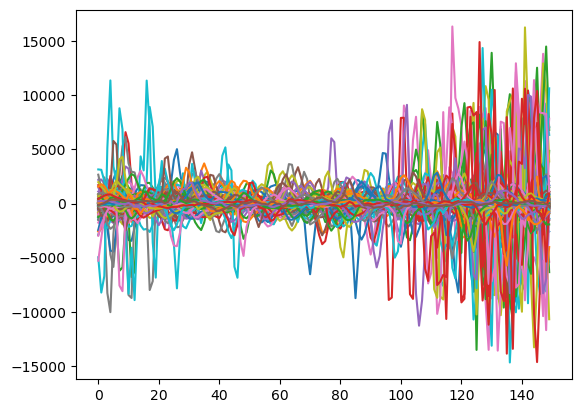

In [25]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

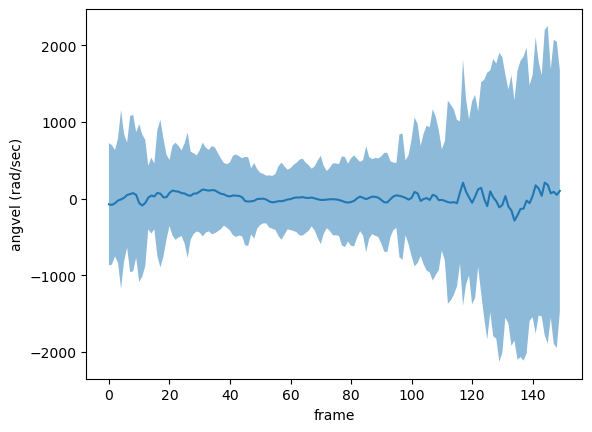

In [26]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

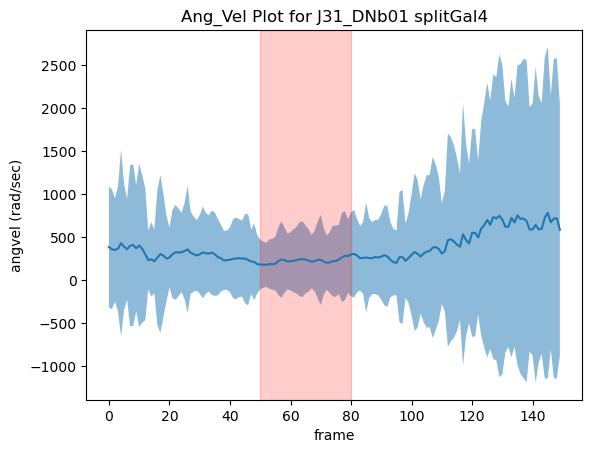

In [27]:
fig, ax = plt.subplots()
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
ax.axvspan(50, 80, color='red', alpha=0.2)
ax.set_title("Ang_Vel Plot for J31_DNb01 splitGal4")
plt.show()

In [28]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241109_185224.braidz")
df,csvs["opto"]


Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241109_185224.braidz using pyarrow


(          obj_id    frame     timestamp         x         y         z  \
 0              1       10           NaN  0.101441  0.144278  0.084023   
 1              1       11           NaN  0.100927  0.144987  0.083829   
 2              1       12           NaN  0.100708  0.145867  0.083545   
 3              1       13           NaN  0.100463  0.146679  0.083294   
 4              1       14           NaN  0.100214  0.147469  0.083016   
 ...          ...      ...           ...       ...       ...       ...   
 12445428  414236  8634804  1.731261e+09 -0.205502  0.052087 -0.003247   
 12445429  414148  8634805  1.731261e+09 -0.023952 -0.149673 -0.002192   
 12445430  414236  8634805  1.731261e+09 -0.205387  0.052138 -0.003170   
 12445431  414148  8634806  1.731261e+09 -0.023966 -0.149678 -0.002187   
 12445432  414236  8634806  1.731261e+09 -0.205256  0.052243 -0.003204   
 
               xvel      yvel      zvel           P00           P01  \
 0        -0.028515  0.084656 -0.026322

In [29]:
data1 = extract_stimulus_centered_data(df,csvs["opto"])
AngVel_First_Repeat = data1['angular_velocity']
LinearVel_First_Repeat = data1["linear_velocity"]

In [30]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241211_140152.braidz")
df,csvs["opto"]

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241211_140152.braidz using pyarrow


(          obj_id    frame     timestamp         x         y         z  \
 0              0    50386  1.733922e+09  0.060760  0.069214  0.117521   
 1              0    50387  1.733922e+09  0.058866  0.069135  0.117149   
 2              0    50388  1.733922e+09  0.056995  0.069017  0.116834   
 3              0    50389  1.733922e+09  0.055072  0.068893  0.116606   
 4              0    50390  1.733922e+09  0.053174  0.068806  0.116402   
 ...          ...      ...           ...       ...       ...       ...   
 18297439  231235  7242897  1.733994e+09 -0.234992 -0.027040  0.003555   
 18297440  231235  7242898  1.733994e+09 -0.234997 -0.027124  0.003629   
 18297441  231235  7242899  1.733994e+09 -0.235015 -0.027190  0.003717   
 18297442  231235  7242900  1.733994e+09 -0.234896 -0.027176  0.003800   
 18297443  231235  7242901  1.733994e+09 -0.234977 -0.027237  0.003884   
 
               xvel      yvel      zvel           P00           P01  \
 0        -0.186502 -0.007864 -0.043996

In [31]:
data2 = extract_stimulus_centered_data(df,csvs["opto"])
AngVel_third_Repeat = data2['angular_velocity']
LinearVel_third_Repeat = data2["linear_velocity"]

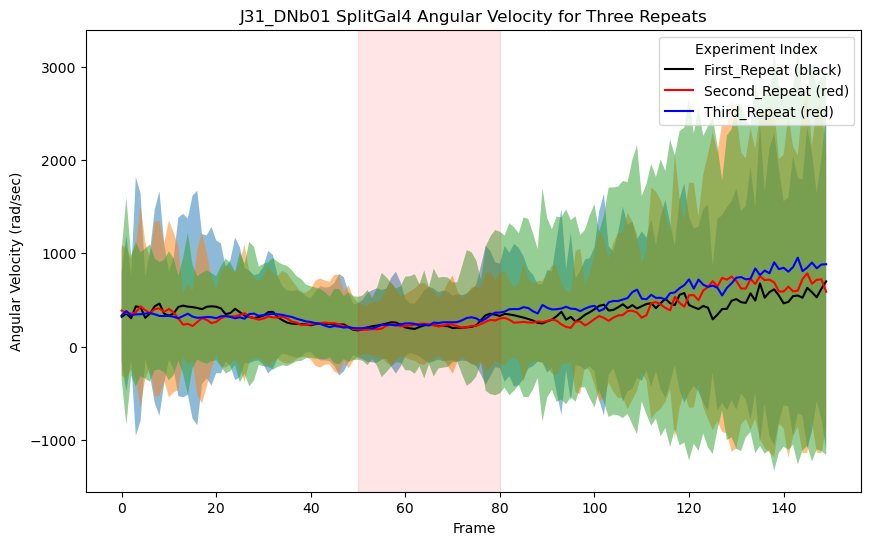

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming plot_mean_and_std is a defined function and you have data like AngV4, AngV5, and AngV6

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the angular velocities with mean and std and adding labels directly
plot_mean_and_std(np.abs(AngVel_First_Repeat), ax=ax, label='First_Repeat (black)', color='black')
plot_mean_and_std(np.abs(AngVel_Second_Repeat), ax=ax, label='Second_Repeat (red)', color='red')
plot_mean_and_std(np.abs(AngVel_third_Repeat), ax=ax, label='Third_Repeat (red)', color='blue')


# Adding labels and title
ax.set_xlabel("Frame")
ax.set_ylabel("Angular Velocity (rad/sec)")
ax.set_title("J31_DNb01 SplitGal4 Angular Velocity for Three Repeats")

ax.axvspan(50, 80, color='red', alpha=0.1)

# Adding the legend to identify each curve
ax.legend(title="Experiment Index")

# Show the plot
plt.show()

In [33]:
AngV_J31_DNb01_SplitGla4 = np.concatenate([AngVel_First_Repeat, AngVel_Second_Repeat, AngVel_third_Repeat])

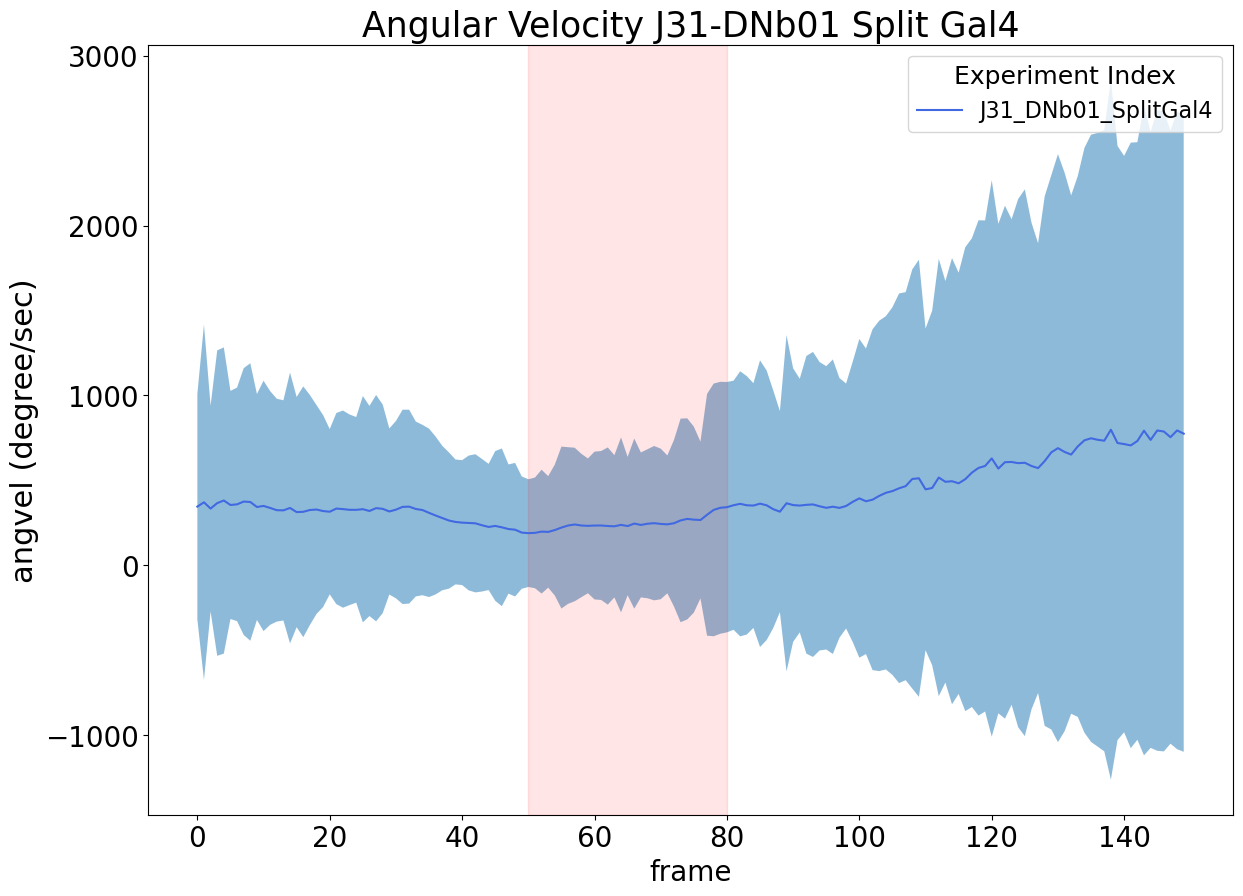

In [34]:
fig, ax = plt.subplots(figsize=(14, 10))
plot_mean_and_std(np.abs(AngV_J31_DNb01_SplitGla4), ax=ax, label='J31_DNb01_SplitGal4', color='royalblue')
ax.set_xlabel("frame", fontsize = 20)
ax.set_ylabel("angvel (degree/sec)")
ax.set_title("Ang_Vel Plot")


ax.axvspan(50, 80, color='red', alpha=0.1)
plt.legend(title="Experiment Index", fontsize=16, title_fontsize=18)

plt.title("Angular Velocity J31-DNb01 Split Gal4", fontsize=25)
plt.ylabel("angvel (degree/sec)", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(False)


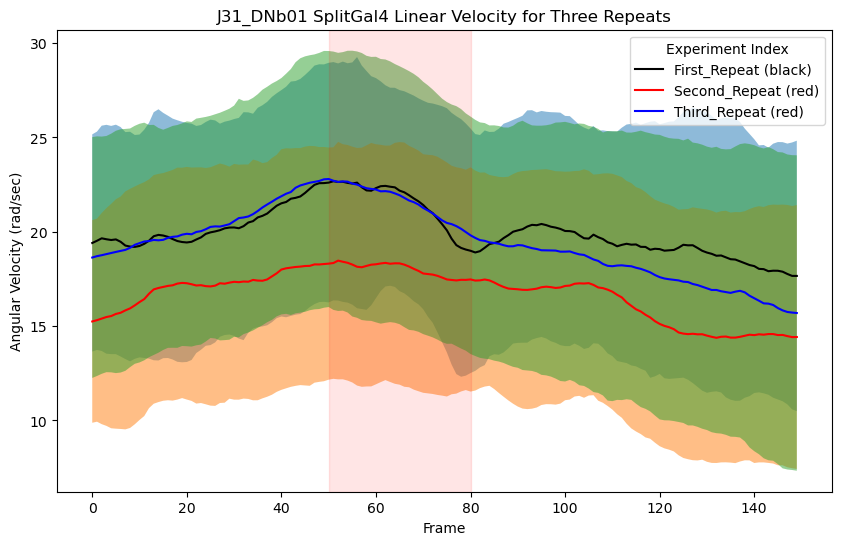

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming plot_mean_and_std is a defined function and you have data like AngV4, AngV5, and AngV6

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the angular velocities with mean and std and adding labels directly
plot_mean_and_std(np.abs(LinearVel_First_Repeat), ax=ax, label='First_Repeat (black)', color='black')
plot_mean_and_std(np.abs(LinearVel_Second_Repeat), ax=ax, label='Second_Repeat (red)', color='red')
plot_mean_and_std(np.abs(LinearVel_third_Repeat), ax=ax, label='Third_Repeat (red)', color='blue')

# Adding labels and title
ax.set_xlabel("Frame")
ax.set_ylabel("Angular Velocity (rad/sec)")
ax.set_title("J31_DNb01 SplitGal4 Linear Velocity for Three Repeats")

ax.axvspan(50, 80, color='red', alpha=0.1)

# Adding the legend to identify each curve
ax.legend(title="Experiment Index")

# Show the plot
plt.show()

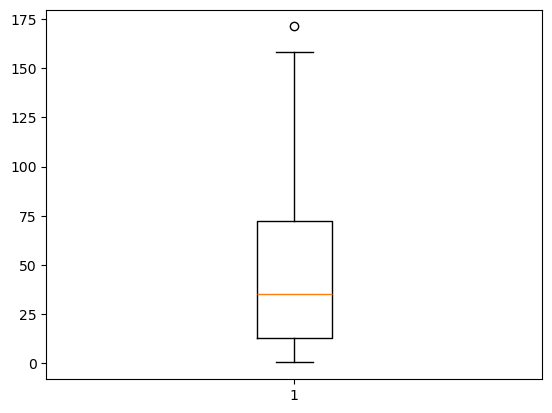

In [38]:
heading_diffs1 = []
for traj in data["position"]:
    heading_diffs1.append(heading_direction_diff(traj, origin=50, end=80, n=10))

plt.figure()
plt.boxplot(np.abs(heading_diffs1))
plt.show()

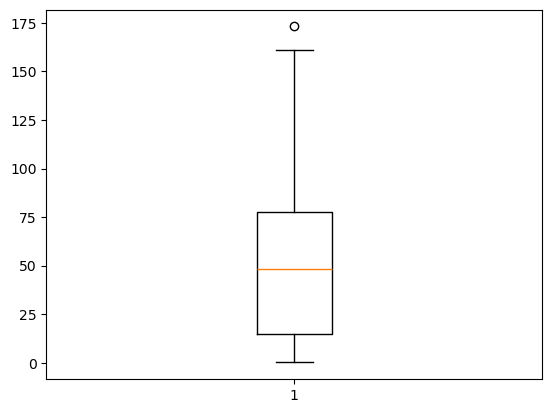

In [41]:
heading_diffs2 = []
for traj in data1["position"]:
    heading_diffs2.append(heading_direction_diff(traj, origin=50, end=80, n=10))

plt.figure()
plt.boxplot(np.abs(heading_diffs2))
plt.show()

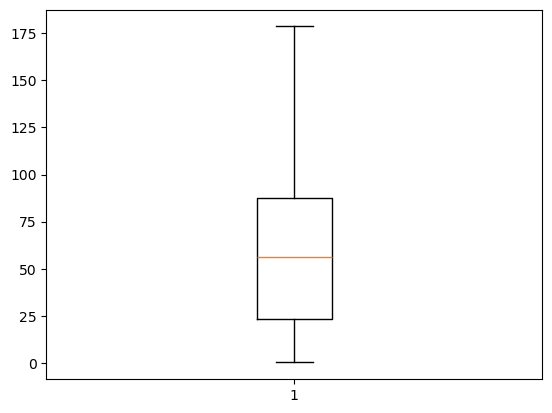

In [42]:
heading_diffs3 = []
for traj in data2["position"]:
    heading_diffs3.append(heading_direction_diff(traj, origin=50, end=80, n=10))

plt.figure()
plt.boxplot(np.abs(heading_diffs3))
plt.show()

In [43]:
heading_diffsJ31 = heading_diffs1 + heading_diffs2 + heading_diffs3

In [48]:
heading_diffsJ31 = np.concatenate([heading_diffs1, heading_diffs2, heading_diffs3])


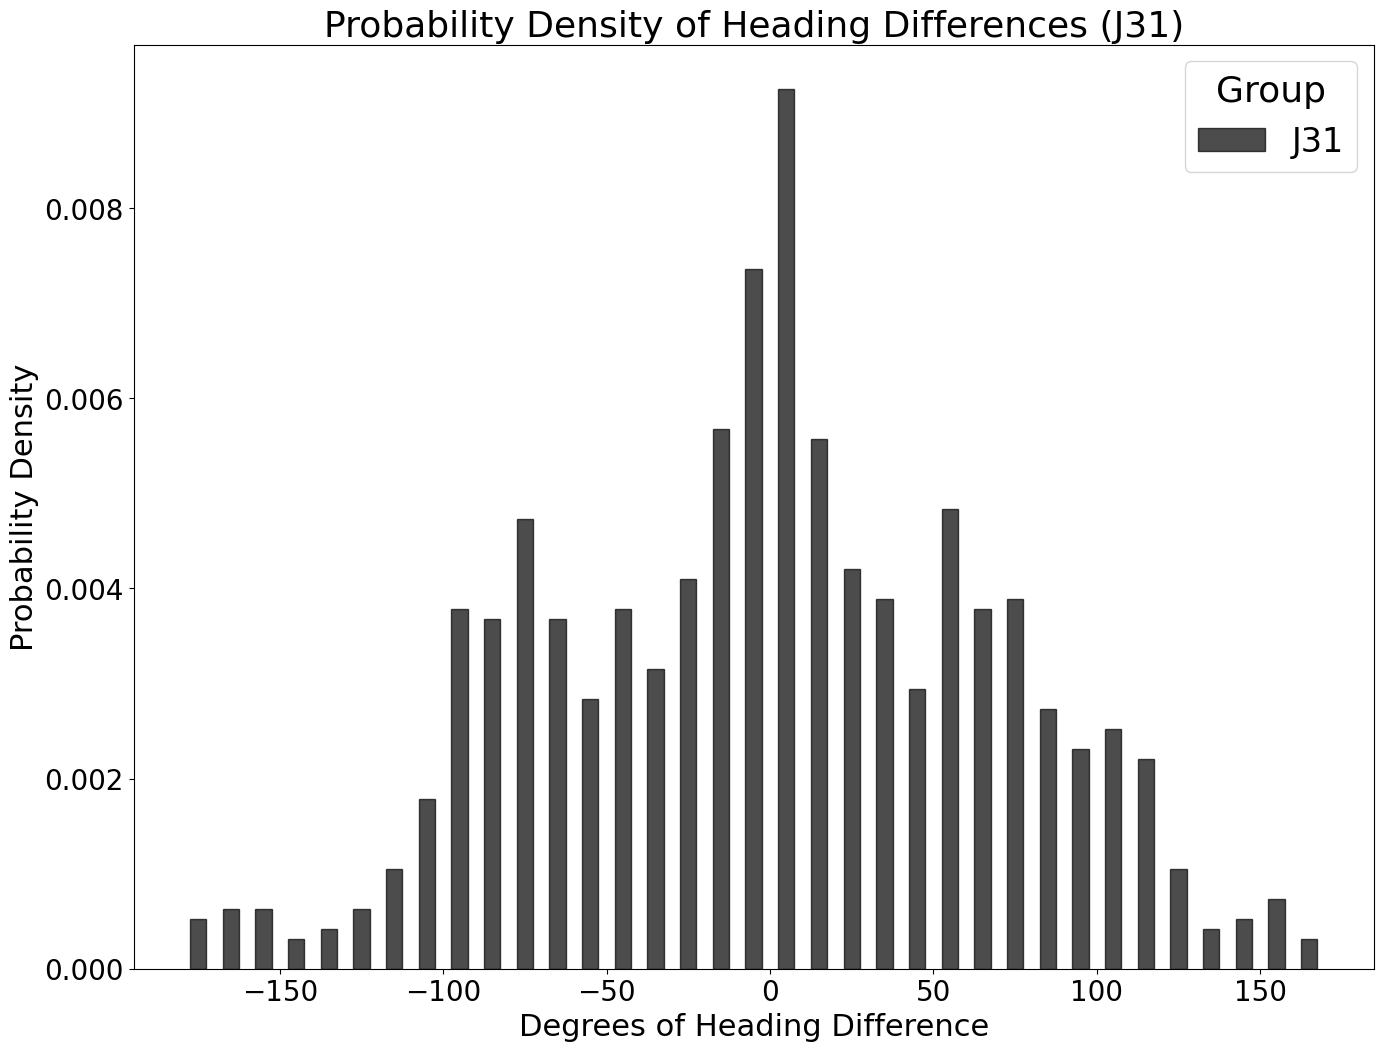

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming heading_diffs_J31 is already defined
heading_diffs_J31 = heading_diffsJ31  # Replace with actual data for J31

# Create a single figure
plt.figure(figsize=(16, 12))

bins = np.arange(-180, 180, 10)  # Bins from -180 to 180 degrees with a width of 5 degrees
bin_width = 5  # Width for each bar

# Calculate the histogram and normalize to get the probability density
hist, bin_edges = np.histogram(heading_diffs_J31, bins=bins, density=True)

# Calculate the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the histogram as bars
plt.bar(bin_centers, hist, width=bin_width, edgecolor='black', alpha=0.7, color='black', label='J31')

# Set the plot labels and title
plt.xlabel('Degrees of Heading Difference', fontsize=22)
plt.ylabel('Probability Density', fontsize=22)
plt.title('Probability Density of Heading Differences (J31)', fontsize=26)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Add a legend
plt.legend(title="Group", fontsize=24, title_fontsize=26)

# Add grid for clarity
plt.grid(False)

# Show the plot
plt.show()


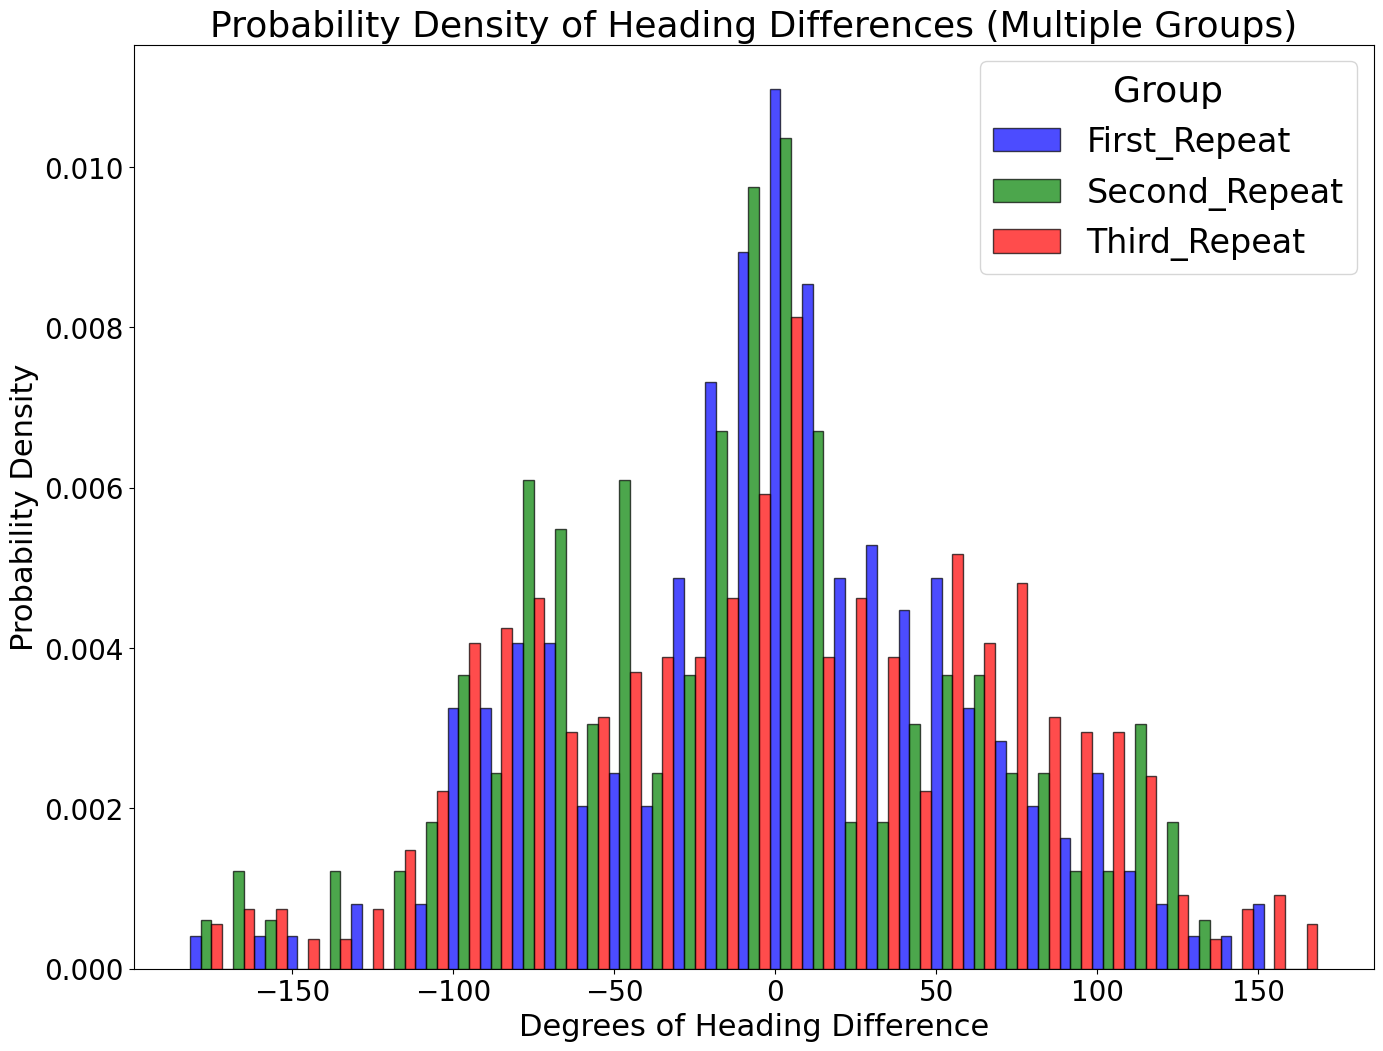

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming heading_diffs1, heading_diffs2, heading_diffs3 are already defined
heading_diffs1 = heading_diffs1  # Replace with actual data for group 1
heading_diffs2 = heading_diffs2  # Replace with actual data for group 2
heading_diffs3 = heading_diffs3  # Replace with actual data for group 3

# Create a single figure
plt.figure(figsize=(16, 12))

bins = np.arange(-180, 180, 10)  # Bins from -180 to 180 degrees with a width of 10 degrees
bin_width = 10  # Width for each bar

# Define the groups and labels
heading_diffs_groups = [heading_diffs1, heading_diffs2, heading_diffs3]
group_labels = ['First_Repeat', 'Second_Repeat', 'Third_Repeat']
colors = ['blue', 'green', 'red']  # Colors for each group

# Iterate through each group and plot the histogram
for i, (heading_diffs, label, color) in enumerate(zip(heading_diffs_groups, group_labels, colors)):
    # Calculate the histogram and normalize to get the probability density
    hist, bin_edges = np.histogram(heading_diffs, bins=bins, density=True)
    
    # Calculate the bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Shift the bars slightly based on the group index 'i' for better visual separation
    offset = (i - len(heading_diffs_groups)/2) * bin_width / len(heading_diffs_groups)
    
    # Plot each group's histogram as a bar
    plt.bar(bin_centers + offset, hist, width=bin_width / len(heading_diffs_groups), 
            edgecolor='black', alpha=0.7, color=color, label=label)

# Set the plot labels and title
plt.xlabel('Degrees of Heading Difference', fontsize=22)
plt.ylabel('Probability Density', fontsize=22)
plt.title('Probability Density of Heading Differences (Multiple Groups)', fontsize=26)

# Customize the ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Add a legend
plt.legend(title="Group", fontsize=24, title_fontsize=26)

# Add grid for clarity
plt.grid(False)

# Show the plot
plt.show()
